In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import healpy as hp

import glob
from natsort import natsorted

import os
from configparser import ConfigParser

In [3]:
import warnings
warnings.filterwarnings("ignore")

# get config

In [4]:
def getconfig():
    '''
    Get the configuration file config.ini from above directories.
    Return: "path/config.ini" as string. 
    '''
    path = os.getcwd()
    pathSplit = path.split("/")

    for k in range(len(pathSplit)):
        path = "/".join(pathSplit[0:len(pathSplit)-k])
        configPath = glob.glob(path+"/*.ini")
        if len(configPath) !=0:
            break
            
    return configPath[0]

# Get parameters from config.ini 
ini = getconfig()
cfg = ConfigParser(inline_comment_prefixes="#")
cfg.read(ini)
config = dict(cfg.items('PARAMETERS'))

# Density to Overdensity data

In [5]:
baseDir = config['basedir']

# # FlaskMaps
# flaskMapsDir = config['flaskmapsdir']
# flaskOverDir = config['over_flaskmaps_autocl']
# flaskDensDir = config['dens_to_over_flaskmaps_autocl']

#Sys
sysDir = config['sys_dir']
densToOverDir = config['dens_to_over_flaskmaps_cross_sys']
overDir = config['over_flaskmaps_cross_sys']

# maps
clMapsDir = config['clmapsdir']

In [6]:
# config.ini

baseDir = config['basedir']

#Sys
sysDir = config['sys_dir']
densToOverDir = config['dens_to_over_flaskmaps_cross_sys']
overDir = config['over_flaskmaps_cross_sys']

# maps
clMapsDir = config['clmapsdir']
clPrefix = config['cl_prefix']

In [7]:
# Real Data PS
psPath = glob.glob(clPrefix+"*")

# Map cros Systematics
sysDir = natsorted(glob.glob(sysDir + "/bin*"))
sysPath = [glob.glob(folder+'/*') for folder in sysDir]

# # Over Systematics erro
# flaskSysDir = natsorted(glob.glob(overDir+'/*'))
# erroPath = [glob.glob(folder+'/*/std-erro.dat') for folder in flaskSysDir]
# flaskSysDir = [glob.glob(folder+'/*') for folder in flaskSysDir]


# Dens2Over Systematics erro
flaskSysDir = natsorted(glob.glob(densToOverDir+'/*'))
erroPath = [glob.glob(folder+'/*/std-erro.dat') for folder in flaskSysDir]
flaskSysDir = [glob.glob(folder+'/*') for folder in flaskSysDir]

In [8]:
# Bins number
# n*(n+1)/2 = size
n = len(psPath)
binsNum = int((-1 + (1 + 4*2*n)**(1/2))/2)

# Indices repetidos
index = []
k = 0
for i in range(binsNum):
    for j in range(binsNum-i):
        if j==0:
            index.append(k)
        k = k + 1

# Systematics Plot

In [14]:
corerrro = '#EDCf0c'
cordat = '#3B3B3B'
li = 2
lerro = li-1

## All Systematics PS

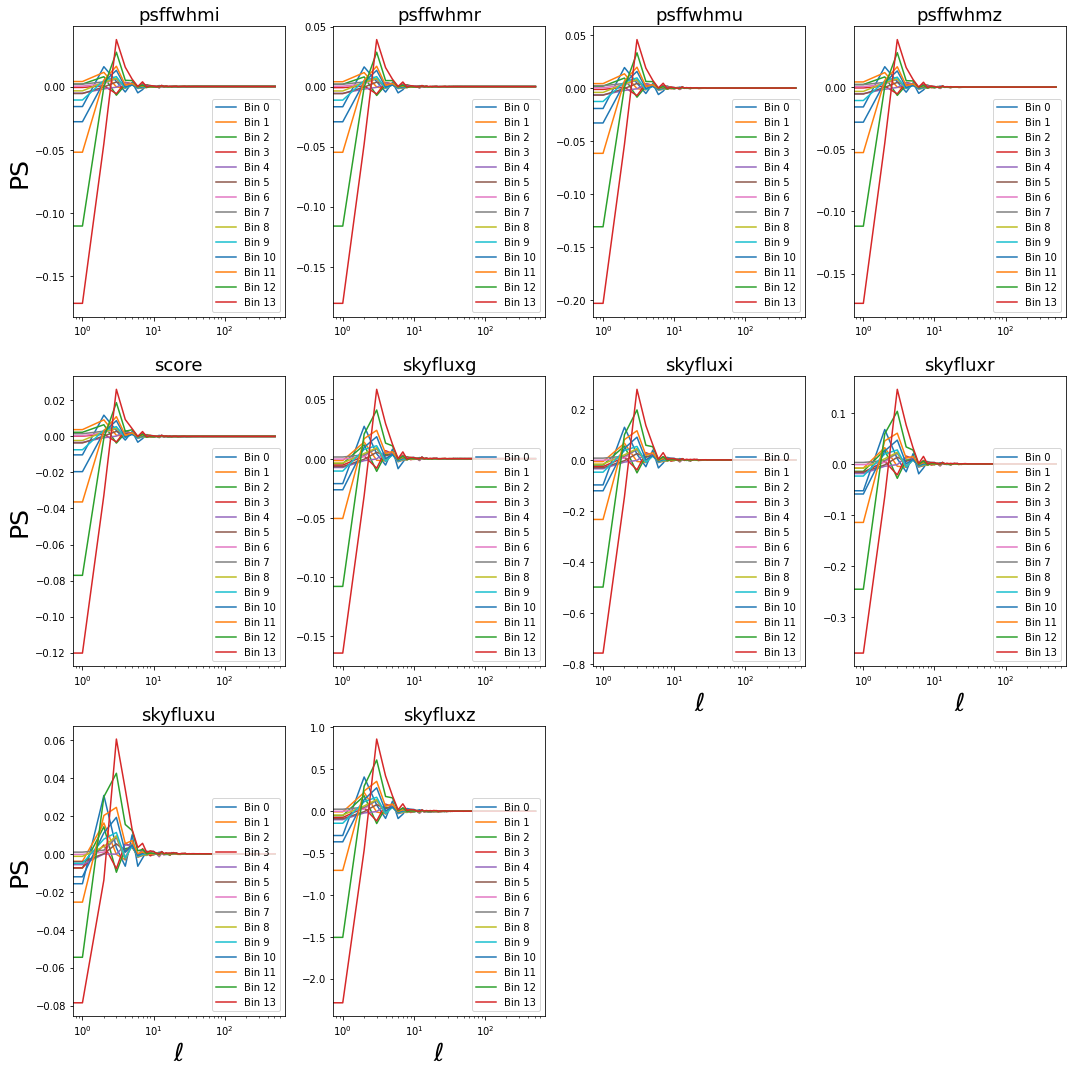

In [162]:
# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 3
colunas = 4

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

# Criar a figura e os subplots
fig, axs = plt.subplots(linhas, colunas, figsize=(15, 15))

# Super Title
# fig.suptitle('Todos os Bins',size=30)

plt.rcParams.update({'legend.loc': 'lower right'})

for i in range(len(sysDir)):
    for j in range(linhas*colunas):
        linha = j // colunas
        coluna = j % colunas
        
        plt.axes(axs[linha, coluna])

        # if don't have map to plot:
        if j+1>len(sysPath[0]):
            plt.axes(axs[linha, coluna]).axis('off')
            continue

        titleValue = os.path.split(sysPath[i][j])[1][:-4]
        titleValue = titleValue.split('-c-')[1]
        plt.title(titleValue, size=18)

        ps = np.loadtxt(sysPath[i][j],skiprows=4)
        plt.plot(ps[:,0],ps[:,1],label=str('Bin '+str(i)))
        
        if j in (6,7,8,9):
            plt.xlabel(r"$\ell$",size=25)
        if coluna==0:
            plt.ylabel("PS", size=25)
        
        plt.xscale('log')
        plt.legend()

plt.tight_layout()
plt.show()

## Systematics by Bin

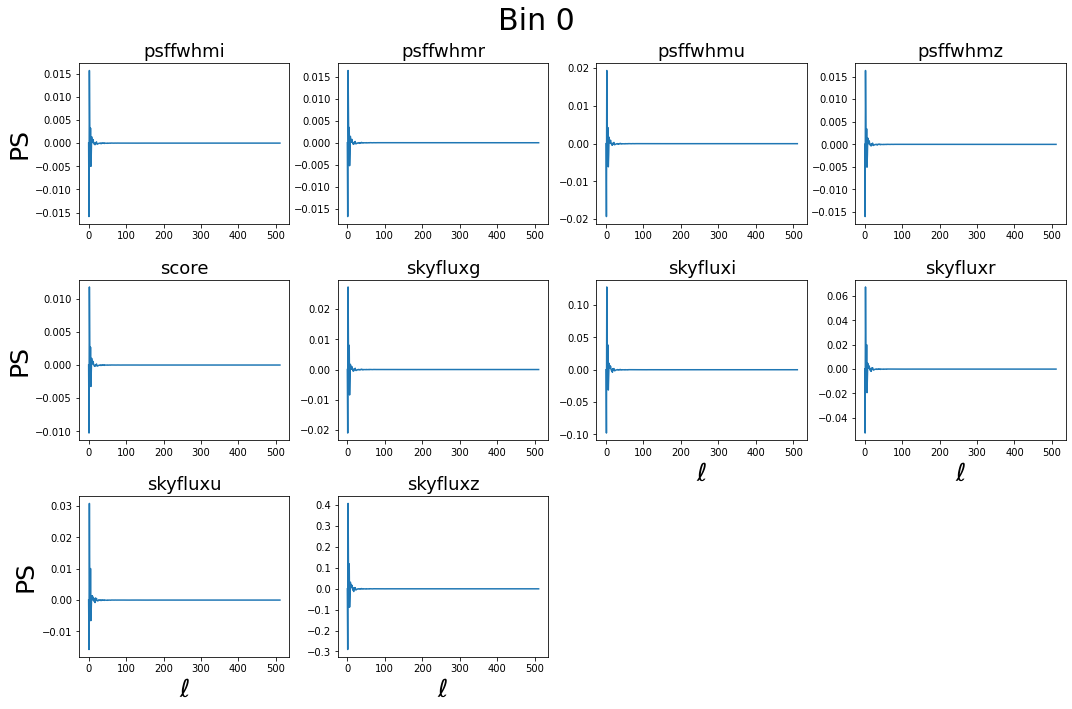

In [12]:
# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 3
colunas = 4

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

for i in range(len(sysDir)):
    # Criar a figura e os subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 10))
    fig.suptitle('Bin '+str(i),size=30)
    for j in range(linhas*colunas):
        linha = j // colunas
        coluna = j % colunas
        
        plt.axes(axs[linha, coluna])

        # if don't have map to plot:
        if j+1>len(sysPath[0]):
            plt.axes(axs[linha, coluna]).axis('off')
            continue

        titleValue = os.path.split(sysPath[i][j])[1][:-4]
        titleValue = titleValue.split('-c-')[1]
        plt.title(titleValue, size=18)

        ps = np.loadtxt(sysPath[i][j],skiprows=4)
        plt.plot(ps[:,0],ps[:,1])
        
        if j in (6,7,8,9):
            plt.xlabel(r"$\ell$",size=25)
        if coluna==0:
            plt.ylabel("PS", size=25)
        
#         plt.xscale('log')
        
    plt.tight_layout()
    plt.show()
    break

## Systematics erro

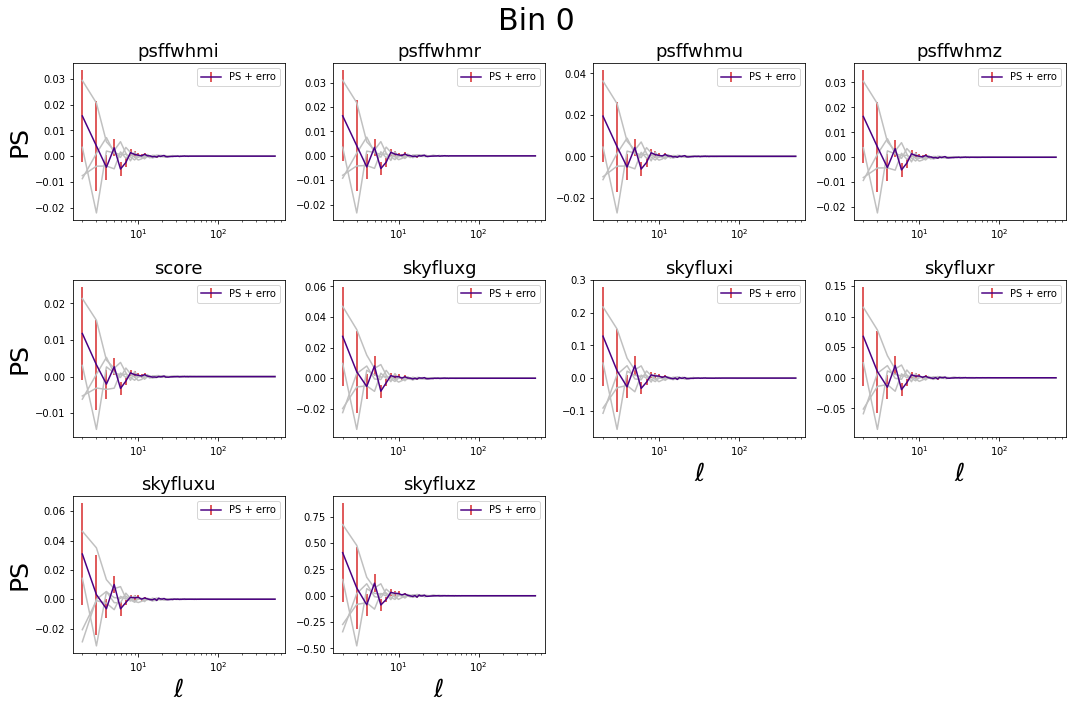

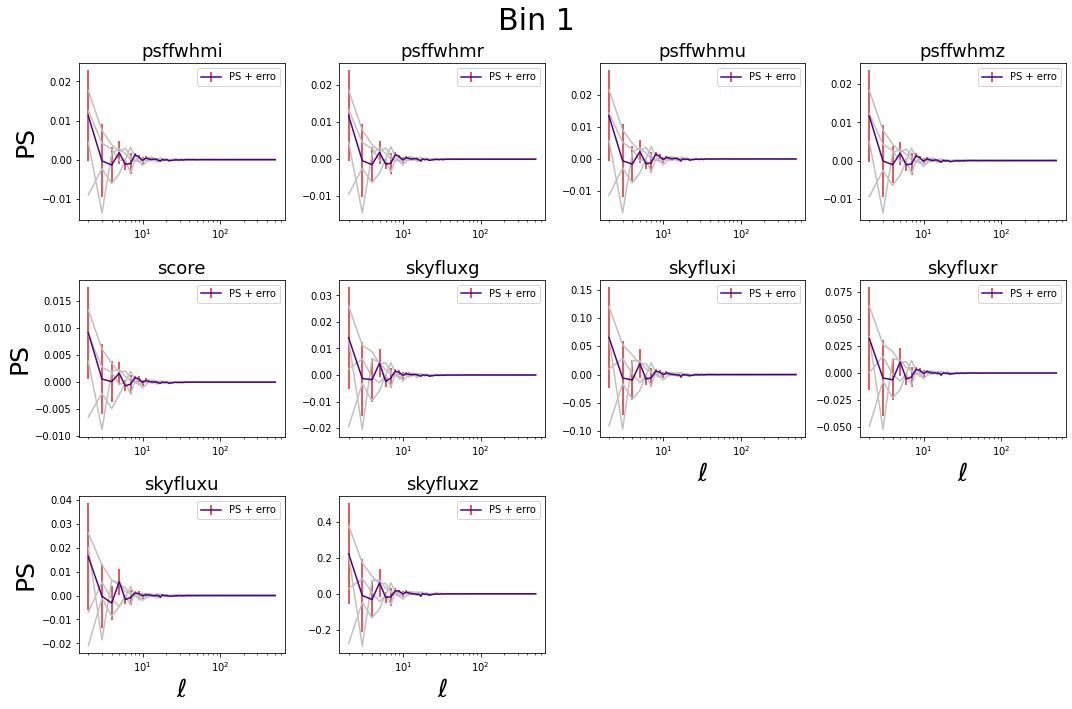

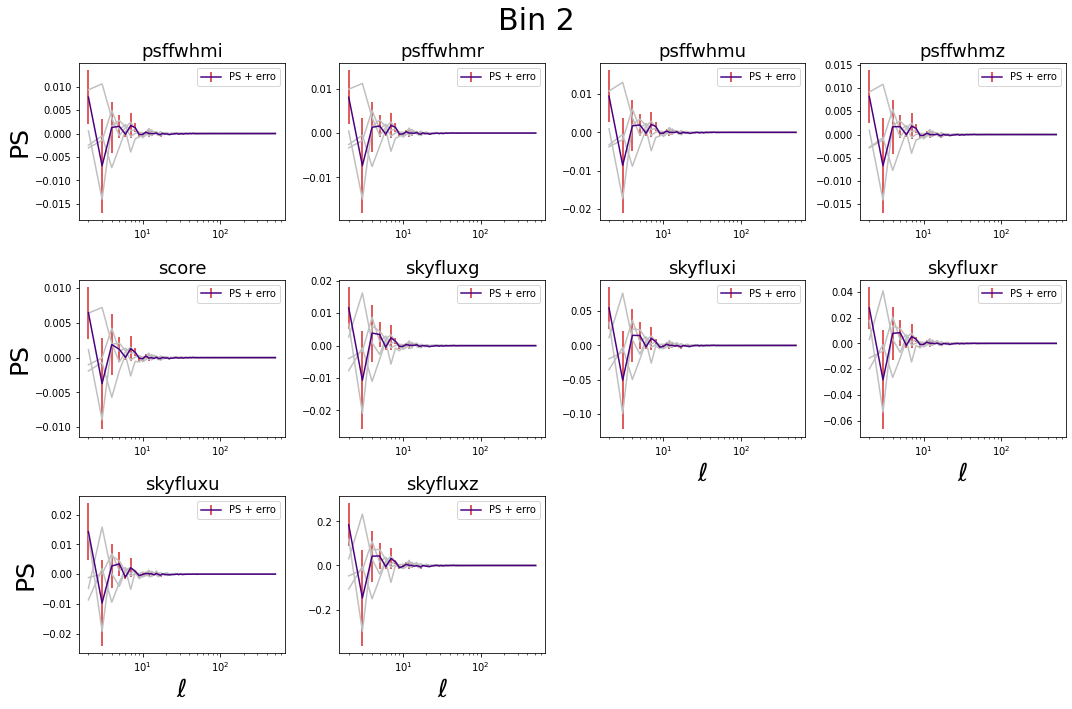

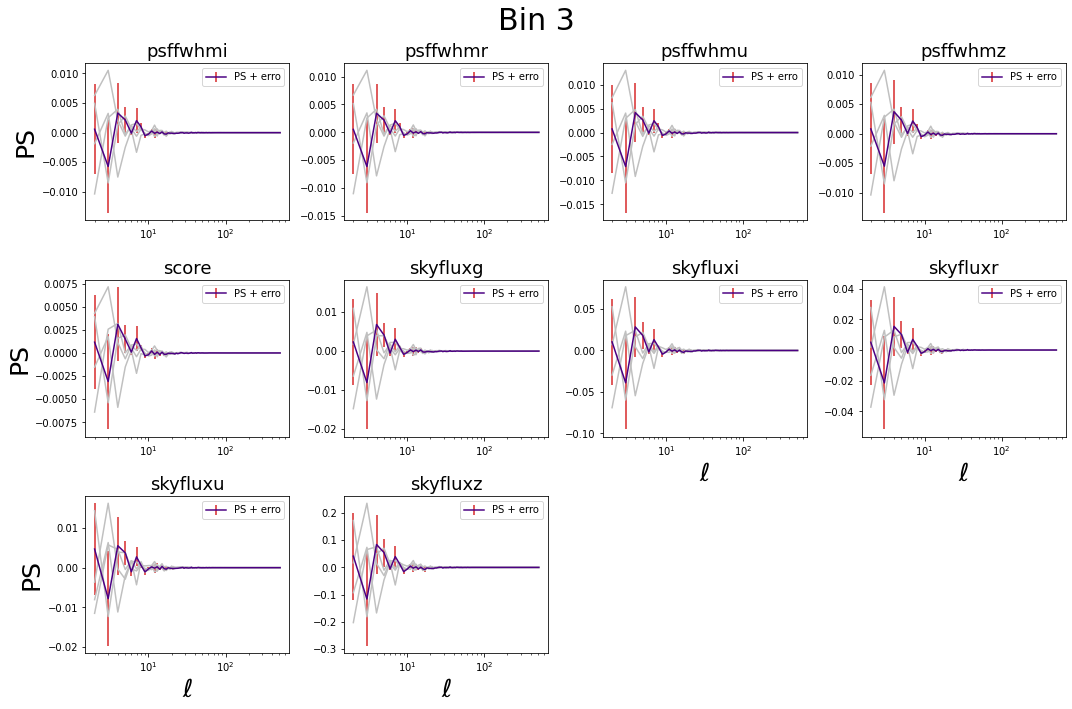

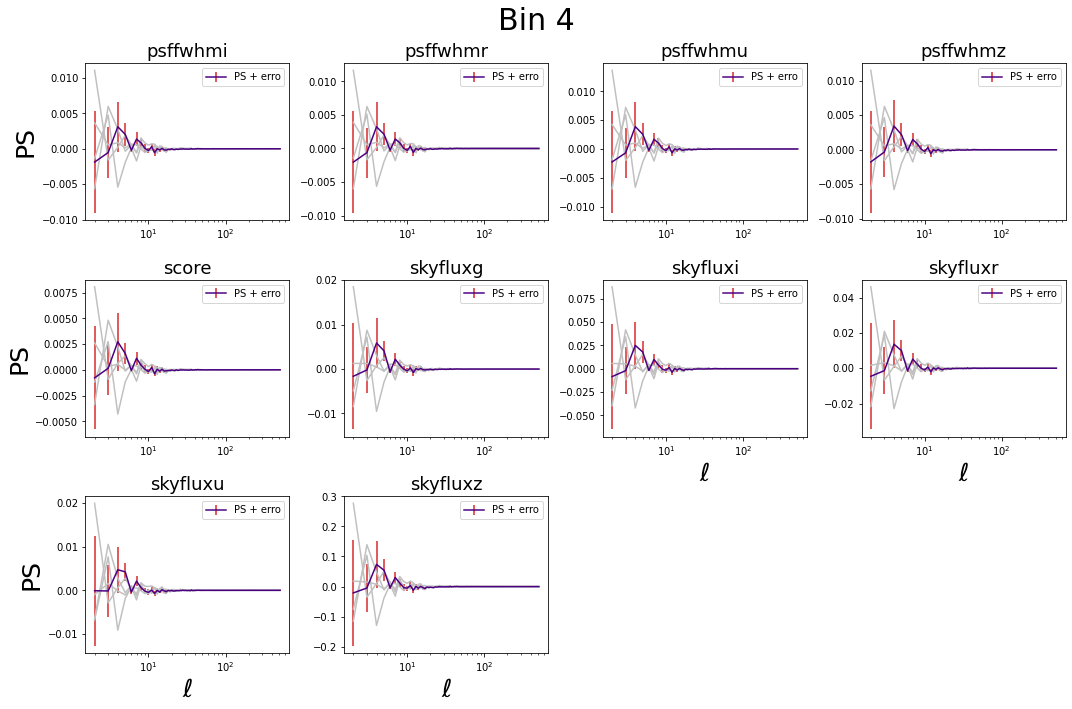

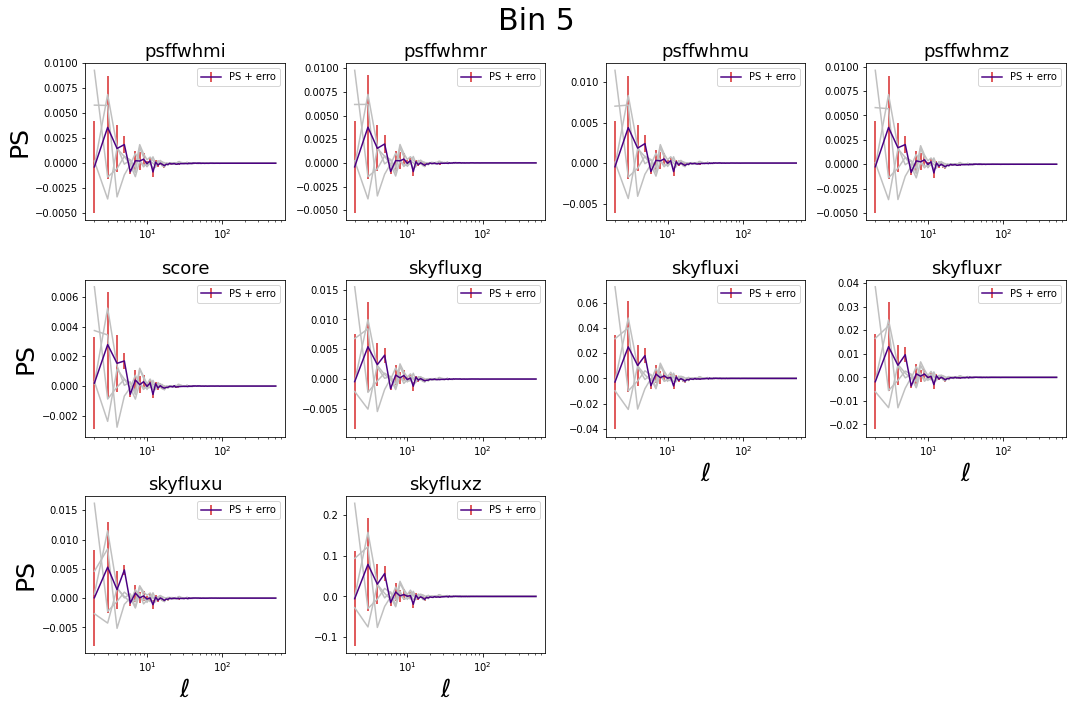

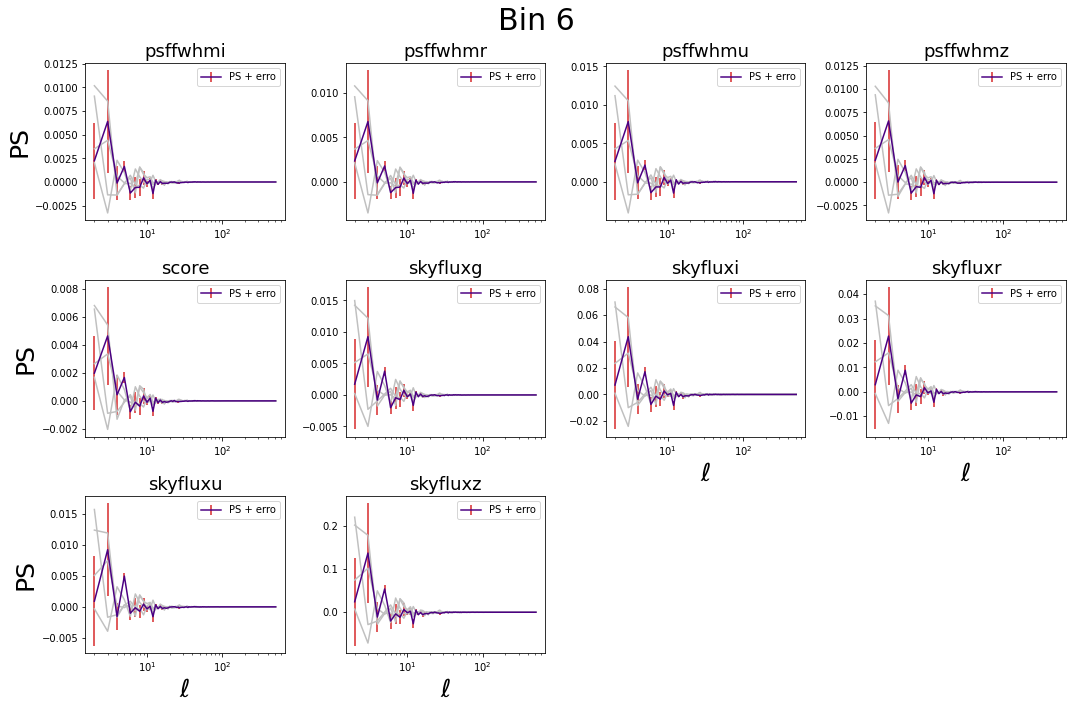

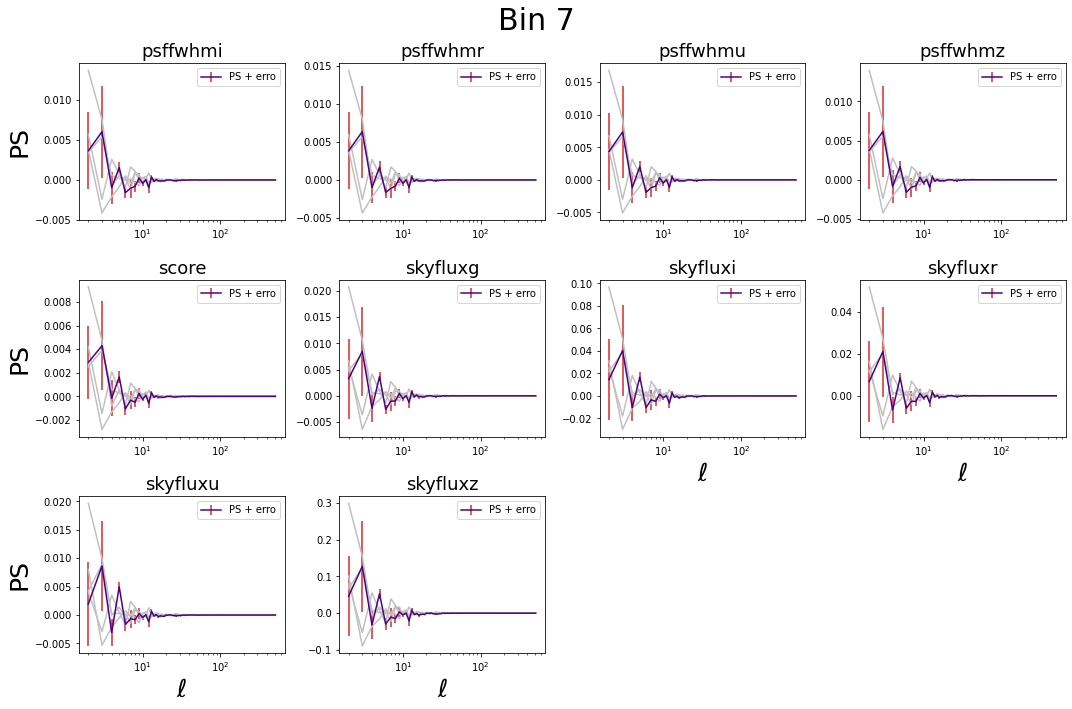

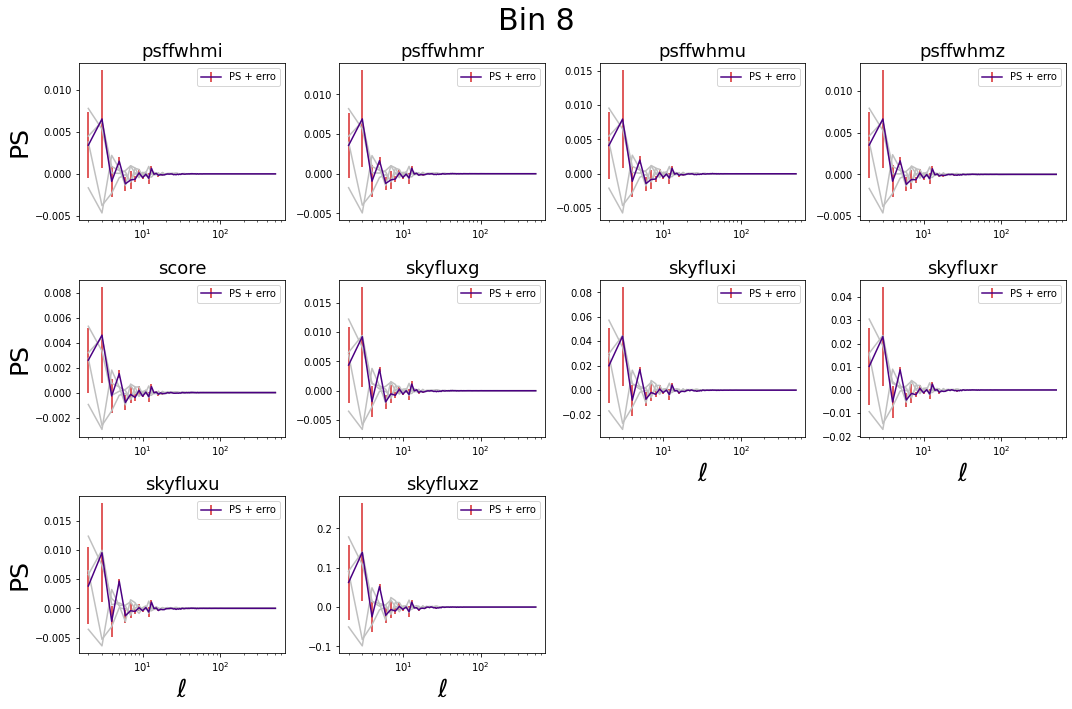

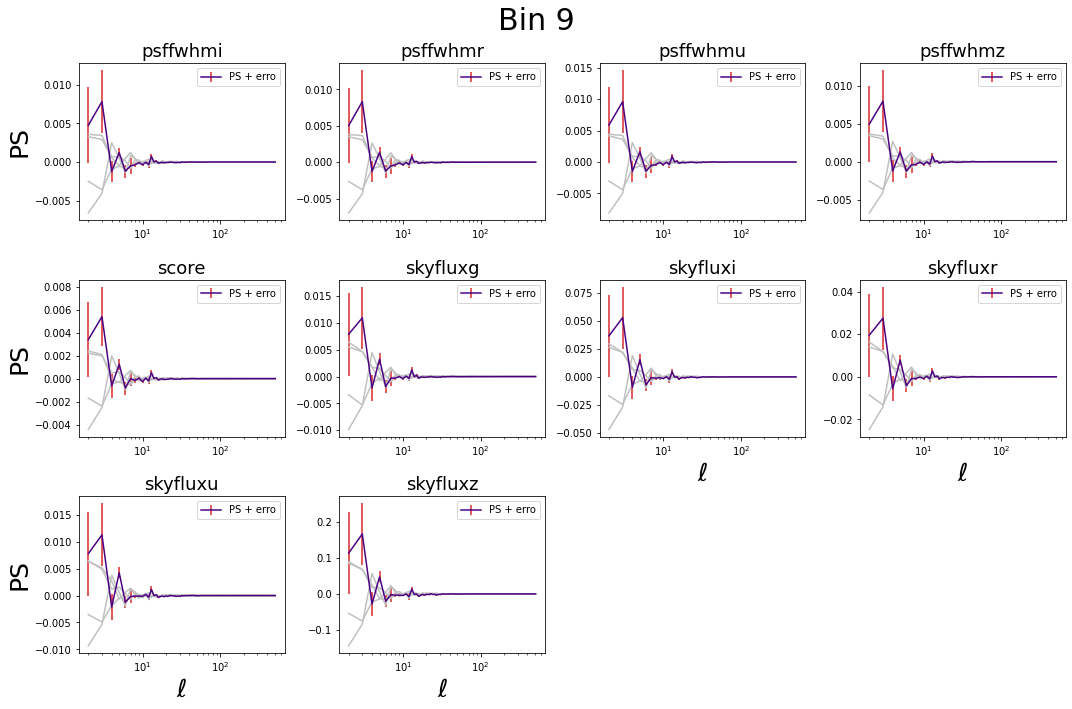

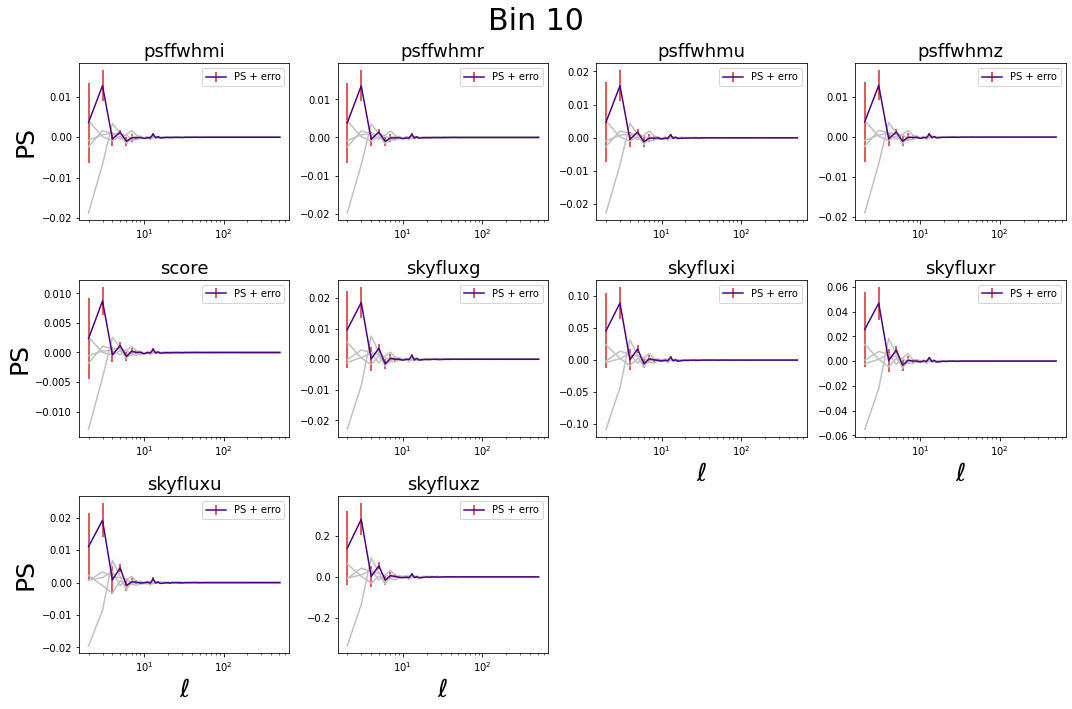

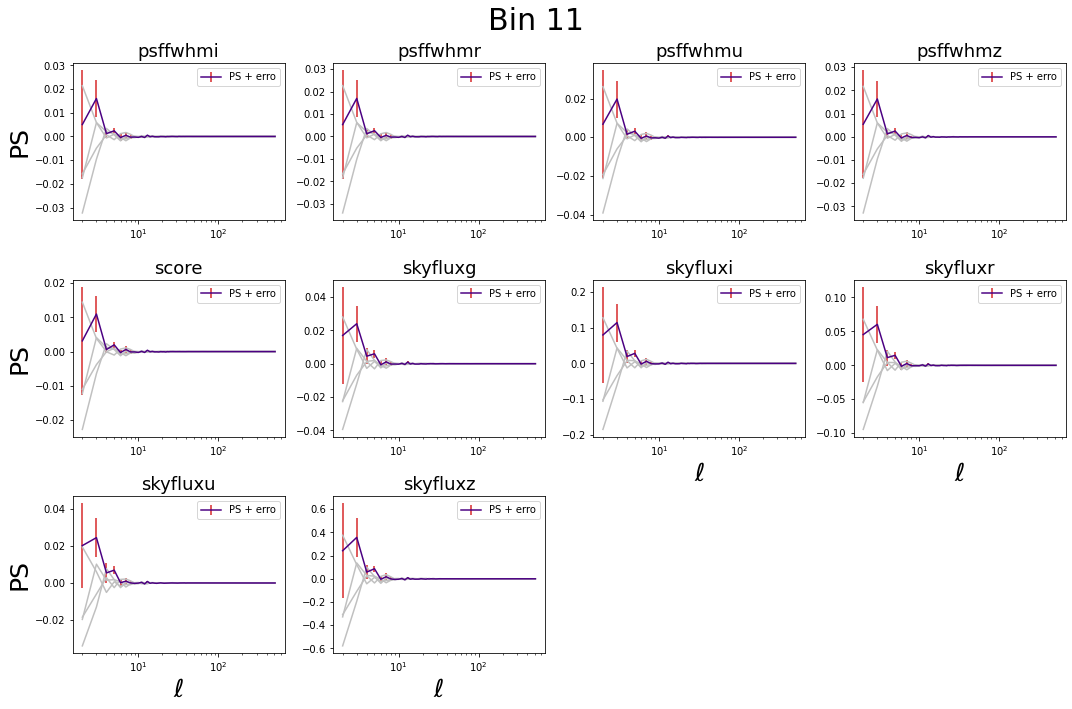

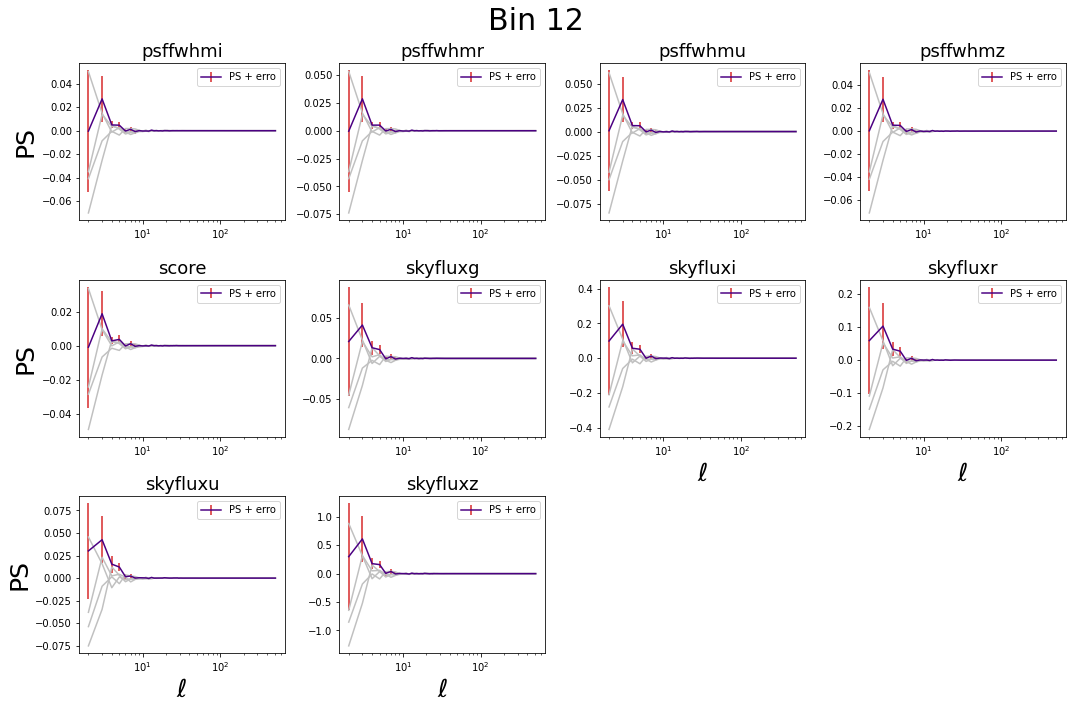

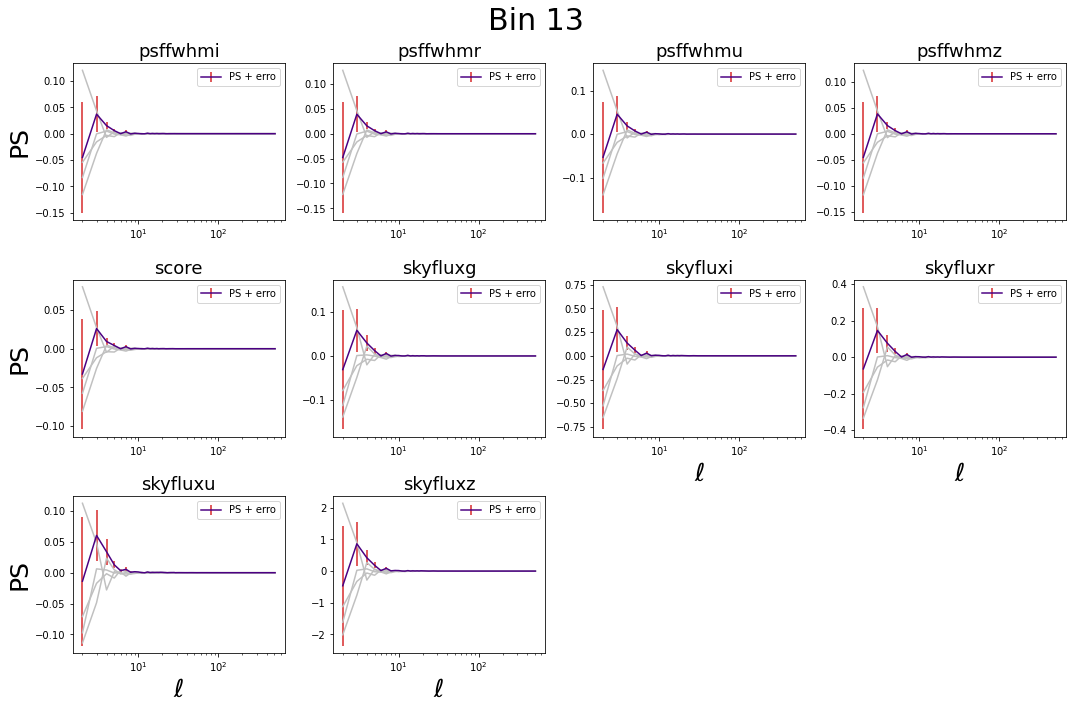

In [15]:
# ERRO

# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 3
colunas = 4

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

plt.rcParams.update({'legend.loc': 'best'})

for i in range(len(sysDir)):
    # Create figure and subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 10))
    fig.suptitle('Bin '+str(i),size=30)
    for j in range(linhas*colunas):
        linha = j // colunas
        coluna = j % colunas
        
        plt.axes(axs[linha, coluna])

        # if don't have map to plot:
        if j+1>len(sysPath[0]):
            plt.axes(axs[linha, coluna]).axis('off')
            continue

        titleValue = os.path.split(sysPath[i][j])[1][:-4]
        titleValue = titleValue.split('-c-')[1]
        plt.title(titleValue, size=18)

        ps = np.loadtxt(sysPath[i][j],skiprows=4)
        erro = np.loadtxt(erroPath[i][j])
        
        plt.errorbar(ps[li:,0], ps[li:,1],yerr=erro[li:,1],color='indigo',ecolor='tab:red',label='PS + erro')
        
        # take all flask simutalions in current bin
        flaskSysPath = glob.glob(flaskSysDir[i][j]+"/bin*")
        for k in range(len(flaskSysPath)):
            ps = np.loadtxt(flaskSysPath[k],skiprows=4)
            plt.plot(ps[li:,0],ps[li:,1],color='silver')
            
        if j in (6,7,8,9):
            plt.xlabel(r"$\ell$",size=25)
        if coluna==0:
            plt.ylabel("PS", size=25)
        
        plt.xscale('log')
        plt.legend()
    plt.tight_layout()
    plt.show()
    break

## ERRO

### Mean Matrix

In [122]:
MatrixMean = np.zeros((len(sysDir),len(sysPath[0])))
lCorte = 10
for i in range(len(sysDir)):
    for j in range(len(sysPath[i])):
        ps = np.loadtxt(sysPath[i][j])
        media = np.float16(np.mean(ps[lCorte:,1]))
        MatrixMean[i][j] = media

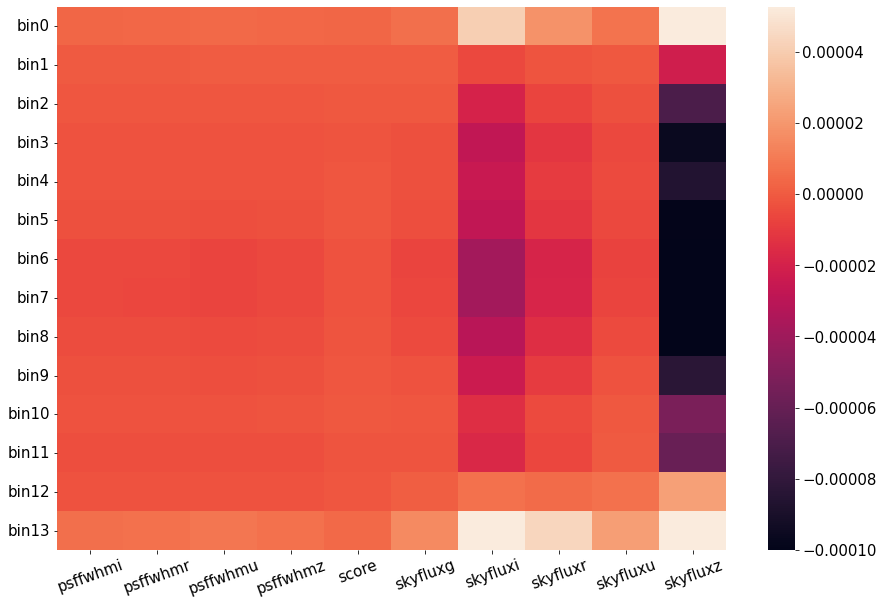

In [151]:
# xticklabels values
xlabels = []
for path in flaskSysDir[0]:
    name = os.path.split(path)[1]
    xlabels.append(name)
    
# yticklabels values
ylabels = []
for path in sysDir:
    name = os.path.split(path)[1]
    ylabels.append(name)

fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(MatrixMean,robust=True,annot=False)

# label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)


# Aumentar o tamanho dos valores dos eixos
ax = plt.gca()
ax.set_xticklabels(xlabels, fontsize=15)
ax.set_yticklabels(ylabels, fontsize=15)

# Girar os rótulos do eixo Y
ax.set_yticklabels(ylabels, rotation=0)
ax.set_xticklabels(xlabels, rotation=20)



plt.show()
plt.close()

### Scatter plot

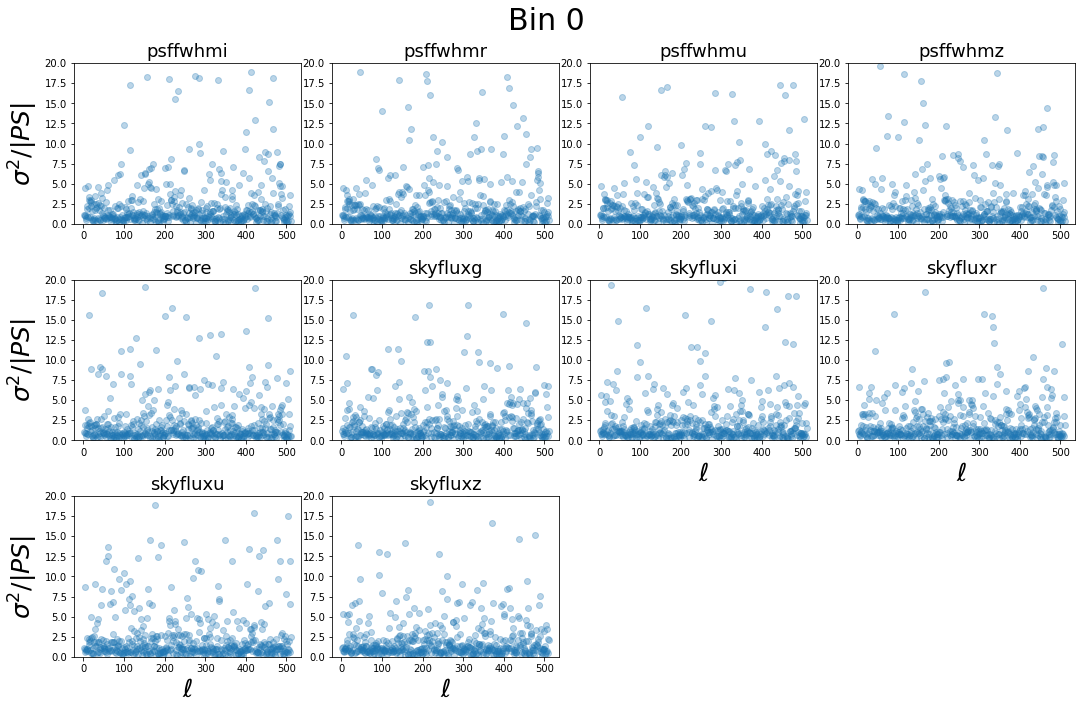

In [16]:
# ERRO SCATTER PLOT

# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 3
colunas = 4

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

plt.rcParams.update({'legend.loc': 'best'})

for i in range(len(sysDir)):
    # Create figure and subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 10))
    fig.suptitle('Bin '+str(i),size=30)
    for j in range(linhas*colunas):
        linha = j // colunas
        coluna = j % colunas
        
        plt.axes(axs[linha, coluna])

        # if don't have map to plot:
        if j+1>len(sysPath[0]):
            plt.axes(axs[linha, coluna]).axis('off')
            continue

        titleValue = os.path.split(sysPath[i][j])[1][:-4]
        titleValue = titleValue.split('-c-')[1]
        plt.title(titleValue, size=18)

        ps = np.loadtxt(sysPath[i][j],skiprows=4)
        erro = np.loadtxt(erroPath[i][j])
        
        plt.scatter(erro[li:,0],erro[li:,1]/np.absolute(ps[li:,1]), alpha=0.3)
        
        if j in (6,7,8,9):
            plt.xlabel(r"$\ell$",size=25)
        if coluna==0:
            plt.ylabel(r"$\sigma^{2}/|PS|$", size=25)
        
#         plt.xscale('log')
#         plt.legend()
        plt.ylim(0,20)
    plt.tight_layout()
    plt.show()
    break

### Histogram

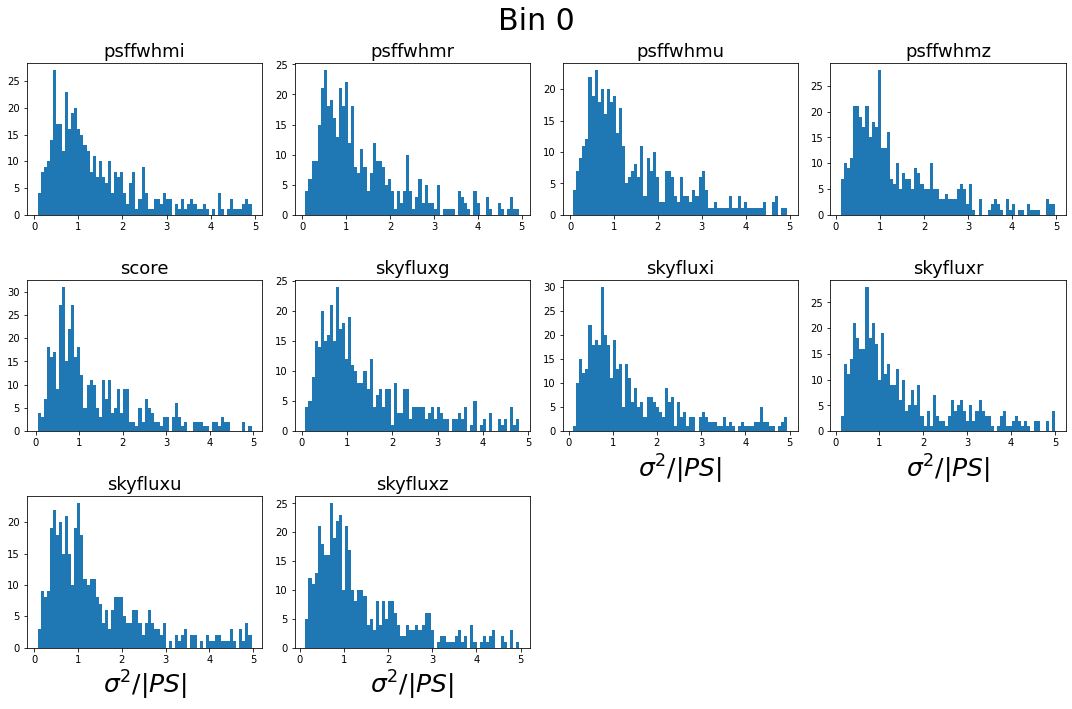

In [17]:
# ERRO SCATTER PLOT

# Configurar a matriz de plotagem
# linhas = int(np.sqrt(n))
# colunas = int(np.ceil(n / linhas))
linhas = 3
colunas = 4

# while linhas*colunas > len(config['nbins']):
#     mapsPath.append(None)
#     mapas.append(None)

plt.rcParams.update({'legend.loc': 'best'})

for i in range(len(sysDir)):
    # Create figure and subplots
    fig, axs = plt.subplots(linhas, colunas, figsize=(15, 10))
    fig.suptitle('Bin '+str(i),size=30)
    for j in range(linhas*colunas):
        linha = j // colunas
        coluna = j % colunas
        
        plt.axes(axs[linha, coluna])

        # if don't have map to plot:
        if j+1>len(sysPath[0]):
            plt.axes(axs[linha, coluna]).axis('off')
            continue

        titleValue = os.path.split(sysPath[i][j])[1][:-4]
        titleValue = titleValue.split('-c-')[1]
        plt.title(titleValue, size=18)

        ps = np.loadtxt(sysPath[i][j],skiprows=4)
        erro = np.loadtxt(erroPath[i][j])
        
        # remove outliers
        const = np.where((erro[li:,1]/np.absolute(ps[li:,1]))<5)
        erro = erro[li:,1]/np.absolute(ps[li:,1])
        
        plt.hist(erro[const],bins=70)
        
        if j in (6,7,8,9):
            plt.xlabel(r"$\sigma^{2}/|PS|$",size=25)
        
#         plt.xscale('log')
#         plt.legend()
#         plt.xlim(-1,100)
    plt.tight_layout()
    plt.show()
    break